# UNDERSTAND THE PROBLEM STATEMENET

# FACIAL EXPRESSION CLASSIFICATION

###### 1) In this project, i have created a deep learning model based on Convolutional Neural Network and Residual Blocks to Predict facial expressions.

###### 2) Facial Expression serves as a basis for Emotional AI Applications like detecting customer emotional responses to Ads and Driver Monitering Systems.



# Importing Libraries and DataSets

In [ ]:
! pip install tensorflow==2.0

In [1]:
import tensorflow as tf
tf.version.VERSION

'2.6.0'

In [2]:
# Importing required Libraries
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pickle
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the files
emotion_df=pd.read_csv("/content/drive/MyDrive/emotion.csv")

In [5]:
# Display the DataFrame
emotion_df.head() # emotion is target and pixels are Independent variable(those are in pixels form)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [6]:
# displaying target class of 3 row
emotion_df['emotion'][2]

2

In [7]:
emotion_df['pixels'] = emotion_df[' pixels'] # String format

In [8]:
# diplaying Independent variable of 2 row
emotion_df['pixels'][2]

'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

In [9]:
# function to convert pixles values in string format into array format
def string2array(x):
  return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

In [10]:
emotion_df['pixels']=emotion_df['pixels'].apply(lambda x:string2array(x))

In [11]:
# shape
emotion_df['pixels'][2].shape

(48, 48, 1)

In [12]:
emotion_df['pixels'][2]

array([[[ 24.],
        [ 32.],
        [ 36.],
        ...,
        [173.],
        [172.],
        [173.]],

       [[ 25.],
        [ 34.],
        [ 29.],
        ...,
        [173.],
        [172.],
        [173.]],

       [[ 26.],
        [ 29.],
        [ 25.],
        ...,
        [172.],
        [172.],
        [174.]],

       ...,

       [[159.],
        [185.],
        [157.],
        ...,
        [157.],
        [156.],
        [153.]],

       [[136.],
        [157.],
        [187.],
        ...,
        [152.],
        [152.],
        [150.]],

       [[145.],
        [130.],
        [161.],
        ...,
        [142.],
        [143.],
        [142.]]], dtype=float32)

In [13]:
# checking null values
emotion_df.isna().sum()

emotion    0
 pixels    0
pixels     0
dtype: int64

In [14]:
# assigning target labels a text values
label_to_text= {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

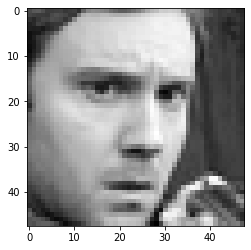

In [15]:
# Visualize the first image in the dataframe and make sure that the image is not distorted by reshaping operation
plt.imshow(emotion_df['pixels'][0].squeeze(),cmap='gray')

# DATA VISUALIZATION

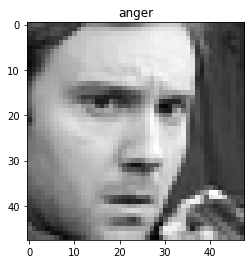

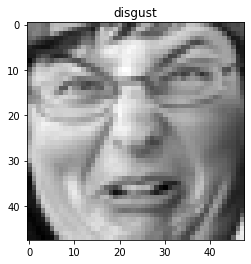

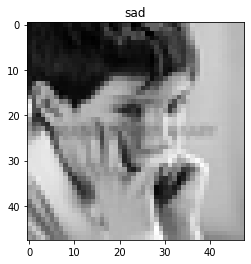

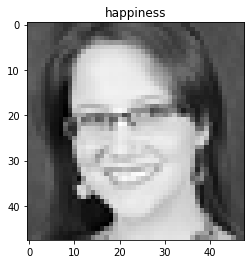

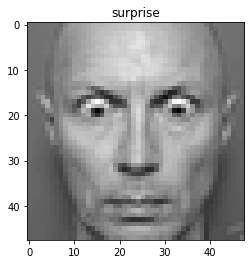

In [16]:
# dislplaying Images of all unique emotion labels
emotions=[0,1,2,3,4]

for i in emotions:
  data=emotion_df[emotion_df['emotion']==i][:1]
  img=data['pixels'].item()
  img=img.reshape(48,48)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap= 'gray')

Text(0.5, 1.0, 'Number of images per emotion')

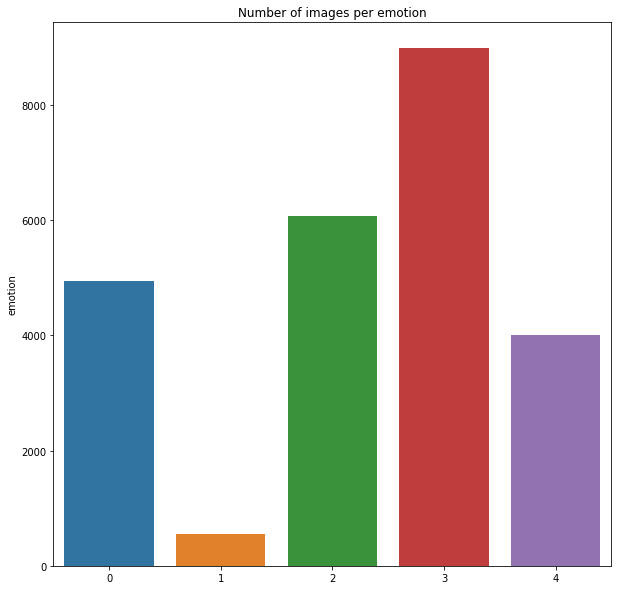

In [17]:
# barplot showing how many samples are present per emotion
plt.figure(figsize = (10, 10))
sns.barplot(x = emotion_df.emotion.value_counts().index, y = emotion_df.emotion.value_counts() )
plt.title('Number of images per emotion')

In [18]:
# From above barplot we can say that the data is imbalanced because the class '0' lables are under represented and class '3' labels are over represented
#so we have to balance the data by techniques like Data Augmentation

# DATA AUGMENTATION, NORMALIZATION and SPLITTING

In [19]:
# split the dataframe to features and labels
X=emotion_df['pixels']
X.shape

(24568,)

In [20]:
# split the dataframe to features and labels
# from keras.utils import to_categorical
X=emotion_df['pixels']

y=pd.get_dummies(emotion_df['emotion'])
X=np.stack(X,axis=0)
X=X.reshape(24568,48,48,1)
print(X.shape,y.shape)

(24568, 48, 48, 1) (24568, 5)


In [21]:
#X

In [22]:
X=np.array(X)
y=np.array(y)

In [23]:
# spliting the dataframe in to train,test and validation data frames

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X,y,test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test,y_Test, test_size = 0.5, shuffle = True)

In [24]:
print(X_val.shape, y_val.shape)

(1228, 48, 48, 1) (1228, 5)


In [25]:
print(X_Test.shape, y_Test.shape)

(1229, 48, 48, 1) (1229, 5)


In [26]:
print(X_train.shape, y_train.shape)

(22111, 48, 48, 1) (22111, 5)


In [27]:
# image pre-processing/ Normalization

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [28]:
# Data Augmentation
train_datagen = ImageDataGenerator(
rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode = "nearest"
)

#  BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

In [29]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [30]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2, 2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 54, 54, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [31]:
# train(compiling) the network
model_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [32]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [33]:
# fitting the model with 40 epochs
history = model_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
epochs= 40, callbacks=[checkpointer, earlystopping])

Epoch 1/40
345/345 [==============================] - 52s 57ms/step - loss: 1.4130 - accuracy: 0.4347 - val_loss: 1.4087 - val_accuracy: 0.3966

Epoch 00001: val_loss improved from inf to 1.40873, saving model to FacialExpression_weights.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
345/345 [==============================] - 18s 51ms/step - loss: 1.1990 - accuracy: 0.5276 - val_loss: 1.1283 - val_accuracy: 0.5179

Epoch 00002: val_loss improved from 1.40873 to 1.12828, saving model to FacialExpression_weights.hdf5
Epoch 3/40
345/345 [==============================] - 18s 52ms/step - loss: 1.0698 - accuracy: 0.5791 - val_loss: 1.2826 - val_accuracy: 0.4560

Epoch 00003: val_loss did not improve from 1.12828
Epoch 4/40
345/345 [==============================] - 19s 55ms/step - loss: 0.9859 - accuracy: 0.6069 - val_loss: 1.2078 - val_accuracy: 0.4707

Epoch 00004: val_loss did not improve from 1.12828
Epoch 5/40
345/345 [==============================] - 18s 53ms/step - loss: 0.9083 - accuracy: 0.6382 - val_loss: 0.9481 - val_accuracy: 0.6189

Epoch 00005: val_loss improved from 1.12828 to 0.94812, saving model to FacialExpression_weights.hdf5
Epoch 6/40
345/345 [==============================] - 18s 53ms/step - loss: 0.8671 - accuracy: 0.6600 - val_loss: 

In [34]:
#saving the model architecture to json file for future use

model_json = model_emotion.to_json()
with open("Emotion-model.json","w") as json_file:
  json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [35]:
for decodedLine in open('FacialExpression_weights.hdf5', 'r', encoding='ISO-8859-1'):
    line = decodedLine.split('\t')

# ASSESS THE PERFORMANCE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [36]:
# Loading the pretrainded model
with open('Emotion-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_emotion = tf.keras.models.model_from_json(json_savedModel)
model_emotion.load_weights('FacialExpression_weights.hdf5')
model_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [37]:
# Evaluating the Model
score = model_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 1s 12ms/step - loss: 0.6765 - accuracy: 0.7429
Test Accuracy: 0.7428804039955139


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
# Loading the accuracy, val_accuracy,loss and val_loss from history file
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

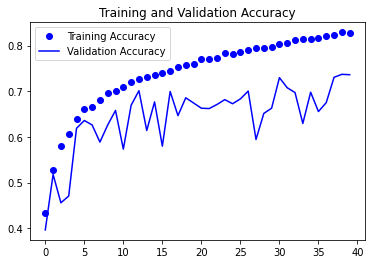

In [40]:
# Plotting the graphs for Training and Validation Accuracy
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

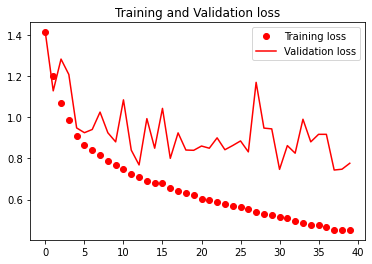

In [41]:
# Plotting the graphs for Training and Validation Loss
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [42]:
# Prediction the test data

predicted_classes = model_emotion.predict(X_Test)
predicted_classes


array([[2.1757819e-01, 1.6343215e-02, 3.0896187e-02, 7.3416060e-01,
        1.0217505e-03],
       [9.3883425e-02, 4.1542863e-04, 2.1620998e-01, 7.1029994e-03,
        6.8238825e-01],
       [1.7277637e-04, 1.5893158e-07, 1.8611197e-04, 4.5813154e-03,
        9.9505961e-01],
       ...,
       [1.5904909e-02, 7.9568017e-01, 1.9097659e-04, 5.0381827e-03,
        1.8318580e-01],
       [1.5340284e-01, 3.0678828e-04, 2.5838453e-02, 4.5216396e-03,
        8.1593025e-01],
       [7.8721839e-01, 3.2196287e-02, 1.2929036e-01, 4.0176954e-02,
        1.1117949e-02]], dtype=float32)

In [43]:
#argmax is simply going to return back the maximum value with the five outputs i am generating
predicted_classes=np.argmax(model_emotion.predict(X_Test),axis=1) 
print("predicted values:",predicted_classes)
y_true = np.argmax(y_Test, axis=1) # actual values
print("Actual values:",y_true)

predicted values: [3 4 4 ... 1 4 0]
Actual values: [0 0 4 ... 1 4 2]


In [44]:
# printing the shapes of actual and predicted y values
print(predicted_classes.shape)
print(y_true.shape)

(1229,)
(1229,)


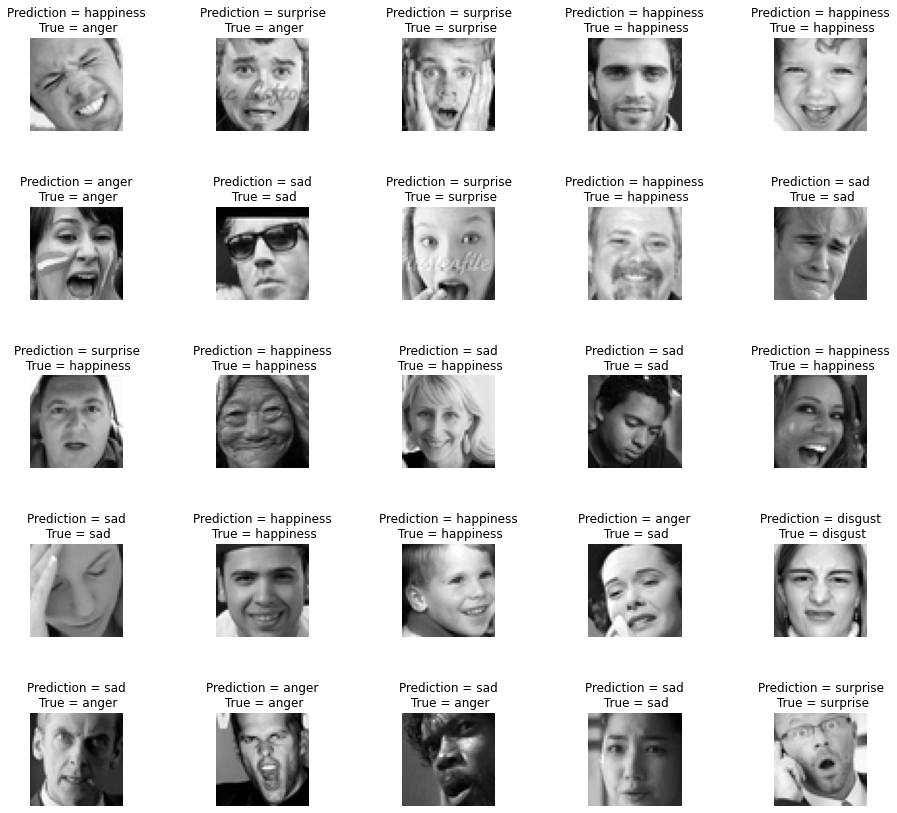

In [45]:
#Print out a grid of 25 images along with their predicted/true label
L = 5 # length
W = 5 # width

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_Test[i].reshape(48,48), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [46]:
#Print out the classification report and analyze precision and recall 
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63       241
           1       0.88      0.44      0.58        32
           2       0.67      0.64      0.65       291
           3       0.86      0.80      0.83       468
           4       0.83      0.86      0.84       197

    accuracy                           0.74      1229
   macro avg       0.76      0.69      0.71      1229
weighted avg       0.75      0.74      0.74      1229



In [47]:
# From Above Classification report we can say that Model actually Good on Class 2 ,3 and 4, and it did poorly on class 1 which is makes sense because it is Under Represented 
#class and Overall Accuray was around 74% which is Good, we can increase the Accuracy by increasing the Number of epochs( in this i only use 40 epochs)